# Modelos de Regresion Lineal
## Modelo con datos simulados
* y = a + b * x
* X: 100 valores distribuidos segun una N(1.5, 2.5)
* Ye = 2 + 2.2 * x + e
* e estara distribuida segun una N(0,0.8)

In [192]:
import pandas as pd
import numpy as np

In [193]:
x = 1.5 + 2.5 * np.random.randn(100)

In [194]:
res = 0 + 0.8 * np.random.randn(100)

In [195]:
y_pred = 2 + 0.5 * x

In [196]:
y_act = 2 + 0.5 * x + res

In [197]:
x_list = x.tolist()

In [198]:
y_pred_list = y_pred.tolist()

In [199]:
y_act_list = y_act.tolist()

In [200]:
data = pd.DataFrame({
    "x": x_list,
    "y_actual": y_act_list,
    "y_pred": y_pred_list
    
})
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

In [201]:
data.head()

,x,y_actual,y_pred
0,3.857940,4.797258,3.928970
1,-0.029518,1.807641,1.985241
2,1.995715,3.043630,2.997857
3,-0.129102,3.105052,1.935449
4,1.869590,3.741761,2.934795


Text(0.5, 1.0, 'Actual vs Prediction')

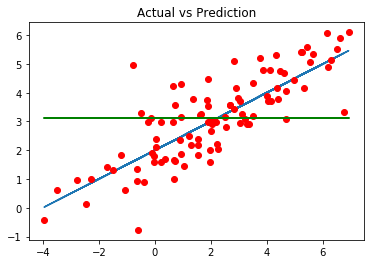

In [202]:
import matplotlib.pyplot as plt

plt.plot(x, y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x,y_mean, "g")
plt.title("Actual vs Prediction")


In [203]:
data["SSR"] = (data["y_pred"] - np.mean(y_act))**2
data["SSD"] = (data["y_pred"] - data["y_actual"])**2
data["SST"] = (data["y_actual"]- np.mean(y_act))**2

In [204]:
data.head()

,x,y_actual,y_pred,SSR,SSD,SST
0,3.857940,4.797258,3.928970,0.664516,0.753923,2.834057
1,-0.029518,1.807641,1.985241,1.273627,0.031542,1.706031
2,1.995715,3.043630,2.997857,0.013441,0.002095,0.004923
3,-0.129102,3.105052,1.935449,1.388492,1.367971,0.000076
4,1.869590,3.741761,2.934795,0.032040,0.651194,0.394345


In [205]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [206]:
SSR

144.27128909417675

In [207]:
SSD

74.56040909398965

In [208]:
SST

221.76339356809203

In [209]:
SSR+SSD

218.8316981881664

In [210]:
R2 = SSR/SST

In [211]:
R2

0.6505640393254468

(array([ 1.,  0.,  3.,  8., 18., 30., 24., 12.,  2.,  2.]),
 array([-3.36395675, -2.78025927, -2.19656178, -1.61286429, -1.0291668 ,
        -0.44546931,  0.13822818,  0.72192567,  1.30562316,  1.88932065,
         2.47301814]),
 <a list of 10 Patch objects>)

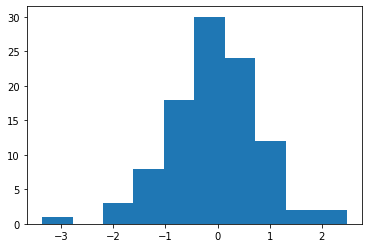

In [212]:
plt.hist(data["y_pred"] - data["y_actual"])

## Obteniendo la recta de regresión
* y = a + b * x
* b = sum(xi -x_m)*(y_i-y_m)
* a = y_m - b * x_m

In [213]:
x_mean = data["x"].mean()
y_mean = data["y_actual"].mean()
x_mean, y_mean

(2.0952414830626096, 3.113791810886092)

In [214]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [215]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [216]:
alpha = y_mean - beta * x_mean

In [217]:
alpha, beta

(2.0523052748701573, 0.5066177548491272)

El modelo lineal obtenido por regresión es:

`y = 1.993981062323456 +  2.228756734255928 * x`

In [218]:
data["y_model"] = alpha + beta * data["x"]

In [219]:
data.head()

,x,y_actual,y_pred,SSR,SSD,SST,beta_n,beta_d,y_model
0,3.857940,4.797258,3.928970,0.664516,0.753923,2.834057,2.967443,3.107108,4.006806
1,-0.029518,1.807641,1.985241,1.273627,0.031542,1.706031,2.775256,4.514601,2.037351
2,1.995715,3.043630,2.997857,0.013441,0.002095,0.004923,0.006983,0.009906,3.063370
3,-0.129102,3.105052,1.935449,1.388492,1.367971,0.000076,0.019441,4.947706,1.986900
4,1.869590,3.741761,2.934795,0.032040,0.651194,0.394345,-0.141702,0.050919,2.999473


In [226]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [227]:
SSR,SSD,SST

(147.6660420714419, 74.09735149665006, 221.76339356809203)

In [228]:
R2 = SSR/SST
R2

0.6658720345840186

Text(0.5, 1.0, 'Actual vs Prediction')

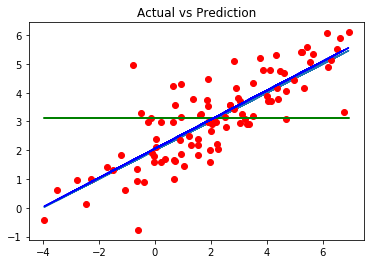

In [229]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]
plt.plot(x, y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x,y_mean, "g")
plt.plot(data["x"],data["y_model"], "b")
plt.title("Actual vs Prediction")


In [230]:
RSE = np.sqrt(SSD/(len(data)-2))

In [232]:
RSE / np.mean(data["y_actual"])

0.27925356913343624